In [6]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import random
import os #to interact with the operating system 
import spotipy
from spotipy.oauth2 import SpotifyOAuth



In [22]:
#importing dataset for moods tracks
songs_raw = pd.read_csv('songs_moods.csv', sep=';')


In [23]:
#checking how many moods
songs_raw

,Name,Artist,Mood
0,Sick Thoughts,Lewis Blissett,Angry
1,Mo Bamba,Sheck Wes,Angry
2,MONTERO (Call Me By Your Name),Lil Nas X,Angry
3,Foot Fungus,Ski Mask The Slump God,Angry
4,Shhh (Pew Pew) - Slowed + Reverb,Young Fanatic,Angry
...,...,...,...
485,enough for you,Olivia Rodrigo,Surprised
486,Botella Tras Botella,Gera MX,Surprised
487,EL MAKINON,KAROL G,Surprised
488,Lost Cause,Billie Eilish,Surprised


In [24]:
#checking dataset size
songs.shape

(490, 3)

In [16]:
#checking song number per mood
songs_raw['Mood'].value_counts()

Disgusted    100
Neutral      100
Sad          100
Happy         80
Surprised     50
Angry         30
Fearful       30
Name: Mood, dtype: int64

In [17]:
#checking for nan's
songs_raw.isna().sum()

Name      0
Artist    0
Mood      0
dtype: int64

In [95]:
#importing libraries for face recognition
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

: 

: 

In [ ]:
#check images

picture_size = 48 #standardize images sizes
folder_path = "/Users/diogocapitao/Documents/DA_Bootcamp/Project/final_project/images/images"

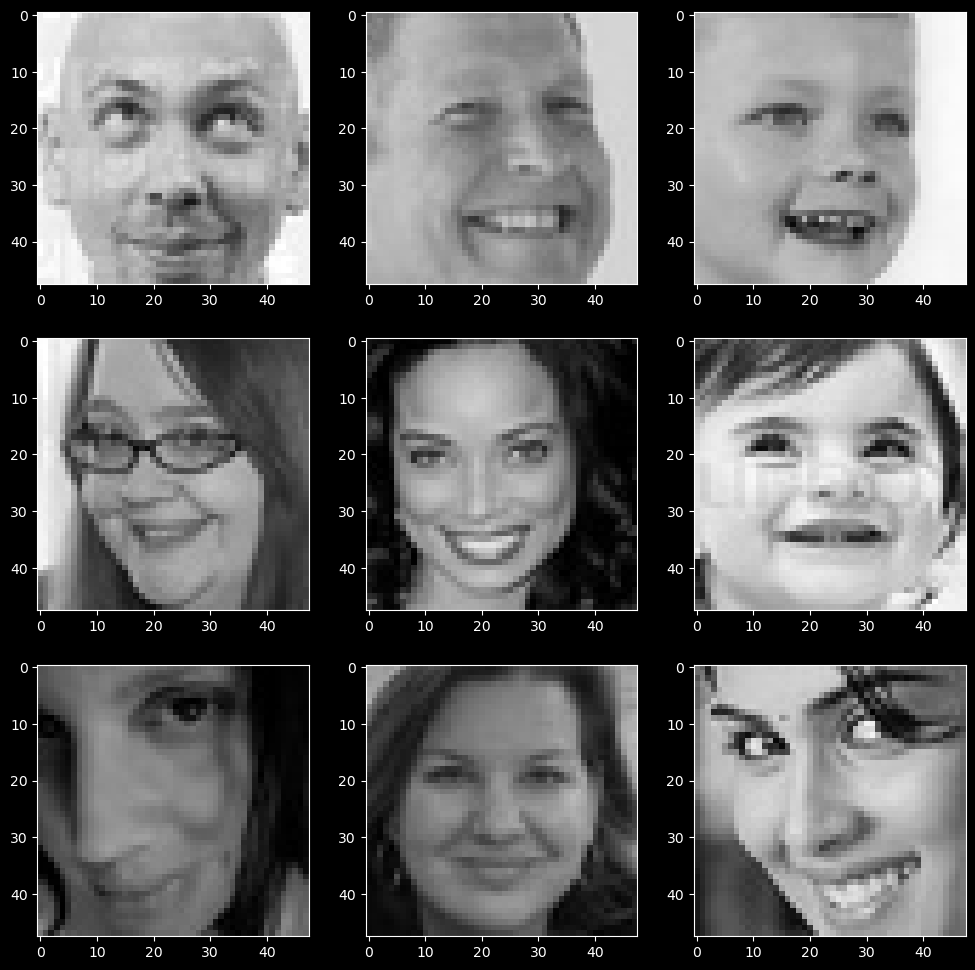

In [ ]:

expression = 'happy'
plt.style.use('dark_background')
plt.figure(figsize= (12,12)) 
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = tf.keras.utils.load_img(folder_path+"/train/"+expression+"/"+
                  os.listdir(folder_path + "/train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

In [ ]:
#Training and validation data

batch_size  = 158 #number that defines how much training examples the model will take

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"/train",
                                              target_size = (picture_size,picture_size), 
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"/validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
#Check number of images :: Training
training_set = 0
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
image_extensions = ['.jpg', '.jpeg', '.png', '.gif']
folder_path = "/Users/diogocapitao/Documents/DA_Bootcamp/Project/final_project/images/images/train/"

for emotion in emotions:
    emotion_folder_path = os.path.join(folder_path, emotion)
    file_list = os.listdir(emotion_folder_path)
    image_files = [file for file in file_list if os.path.splitext(file)[1] in image_extensions]
    num_images = len(image_files)
    training_set += num_images
    print(f"Number of images in {emotion_folder_path}: {num_images}")


Number of images in /Users/diogocapitao/Documents/DA_Bootcamp/Project/final_project/images/images/train/angry: 3993
Number of images in /Users/diogocapitao/Documents/DA_Bootcamp/Project/final_project/images/images/train/disgust: 436
Number of images in /Users/diogocapitao/Documents/DA_Bootcamp/Project/final_project/images/images/train/fear: 4103
Number of images in /Users/diogocapitao/Documents/DA_Bootcamp/Project/final_project/images/images/train/happy: 7164
Number of images in /Users/diogocapitao/Documents/DA_Bootcamp/Project/final_project/images/images/train/neutral: 4982
Number of images in /Users/diogocapitao/Documents/DA_Bootcamp/Project/final_project/images/images/train/sad: 4938
Number of images in /Users/diogocapitao/Documents/DA_Bootcamp/Project/final_project/images/images/train/surprise: 3205


In [ ]:
training_set # total of training images

28821

In [ ]:
#Check number of images :: Validation
validation_set = 0
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
image_extensions = ['.jpg', '.jpeg', '.png', '.gif']
folder_path = "/Users/diogocapitao/Documents/DA_Bootcamp/Project/final_project/images/images/validation/"

for emotion in emotions:
    emotion_folder_path = os.path.join(folder_path, emotion)
    file_list = os.listdir(emotion_folder_path)
    image_files = [file for file in file_list if os.path.splitext(file)[1] in image_extensions]
    num_images = len(image_files)
    validation_set += num_images
    print(f"Number of images in {emotion_folder_path}: {num_images}")


Number of images in /Users/diogocapitao/Documents/DA_Bootcamp/Project/final_project/images/images/validation/angry: 960
Number of images in /Users/diogocapitao/Documents/DA_Bootcamp/Project/final_project/images/images/validation/disgust: 111
Number of images in /Users/diogocapitao/Documents/DA_Bootcamp/Project/final_project/images/images/validation/fear: 1018
Number of images in /Users/diogocapitao/Documents/DA_Bootcamp/Project/final_project/images/images/validation/happy: 1825
Number of images in /Users/diogocapitao/Documents/DA_Bootcamp/Project/final_project/images/images/validation/neutral: 1216
Number of images in /Users/diogocapitao/Documents/DA_Bootcamp/Project/final_project/images/images/validation/sad: 1139
Number of images in /Users/diogocapitao/Documents/DA_Bootcamp/Project/final_project/images/images/validation/surprise: 797


In [ ]:
validation_set # total of validation images

7066

In [ ]:
#applying model

no_of_classes = 7 #possible emotions

model = Sequential() 

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1))) #64 is the number of filters, 48X48 is image size
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#Fitting the model 
checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max') #to save the model

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])


In [ ]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs, #number of times the entire training dataset will be iterated during the training process
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

/var/folders/tj/3p22v50d6ns8hpw1fn28jhmr0000gn/T/ipykernel_14630/3853974908.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


Epoch 1/48
182/182 [==============================] - 556s 3s/step - loss: 1.8041 - accuracy: 0.3048 - val_loss: 1.7928 - val_accuracy: 0.3031 - lr: 0.0010
Epoch 2/48
182/182 [==============================] - 510s 3s/step - loss: 1.4603 - accuracy: 0.4403 - val_loss: 1.5489 - val_accuracy: 0.4173 - lr: 0.0010
Epoch 3/48
182/182 [==============================] - 668s 4s/step - loss: 1.2932 - accuracy: 0.5035 - val_loss: 1.3087 - val_accuracy: 0.4970 - lr: 0.0010
Epoch 4/48
182/182 [==============================] - 606s 3s/step - loss: 1.1998 - accuracy: 0.5422 - val_loss: 1.3717 - val_accuracy: 0.4789 - lr: 0.0010
Epoch 5/48
182/182 [==============================] - 563s 3s/step - loss: 1.1423 - accuracy: 0.5632 - val_loss: 1.1641 - val_accuracy: 0.5547 - lr: 0.0010
Epoch 6/48
182/182 [==============================] - 642s 4s/step - loss: 1.0810 - accuracy: 0.5883 - val_loss: 1.1401 - val_accuracy: 0.5692 - lr: 0.0010
Epoch 7/48
182/182 [==============================] - 597s 3s/st

In [ ]:
print("Final Training Accuracy:", history.history['accuracy'][-1])
print("Final Validation Accuracy:", history.history['val_accuracy'][-1])


Final Training Accuracy: 0.6908558011054993
Final Validation Accuracy: 0.5945051908493042


In [25]:
# ADDING THE SONGS
songs_raw

,Name,Artist,Mood
0,Sick Thoughts,Lewis Blissett,Angry
1,Mo Bamba,Sheck Wes,Angry
2,MONTERO (Call Me By Your Name),Lil Nas X,Angry
3,Foot Fungus,Ski Mask The Slump God,Angry
4,Shhh (Pew Pew) - Slowed + Reverb,Young Fanatic,Angry
...,...,...,...
485,enough for you,Olivia Rodrigo,Surprised
486,Botella Tras Botella,Gera MX,Surprised
487,EL MAKINON,KAROL G,Surprised
488,Lost Cause,Billie Eilish,Surprised


In [38]:
#data cleaning 

songs_raw['Mood'] = songs_raw['Mood'].replace('Fearful', 'Fear') # to be possible to match with the face recognition set
songs_raw['Mood'] = songs_raw['Mood'].replace('Surprised', 'Surprise')
songs_raw.rename(columns={'Name': 'Track'}, inplace=True)

songs_raw.to_csv('cleaned_songs.csv', index=False)

songs = songs_raw


In [39]:
# path for the folder with the pictures
folder_path = '/Users/diogocapitao/Documents/DA_Bootcamp/Project/final_project/pictures'

# Get the list of files in the folder
files = os.listdir(folder_path)

# Sorting the files by their modified time in descending order
sorted_files = sorted(files, key=lambda x: os.path.getmtime(os.path.join(folder_path, x)), reverse=True)


In [40]:
last_file = sorted_files[0]
match = re.search(r'^(.*?)---', last_file)
emotion = match.group(1).lower()

In [41]:
emotion

'happy'

In [42]:
#creating a function to return songs per mood (capured on the pictures)

def moody_tunes(folder_path, emotion, songs):
    # Get the list of files in the folder
    files = os.listdir(folder_path)

    # Sorting the files by their modified time in descending order
    sorted_files = sorted(files, key=lambda x: os.path.getmtime(os.path.join(folder_path, x)), reverse=True)

    if sorted_files:
        last_file = sorted_files[0]
        # Extract the emotion from the last added file name
        match = re.search(r'^(.*?)---', last_file)
        if match:
            emotion = match.group(1).lower()
            print(f"For your {emotion} mood, your tunes are:")
            # Filter songs by mood/emotion
            emotion_songs = songs[songs['Mood'] == emotion]
            # Randomly select 7 songs
            random_songs = emotion_songs.sample(n=7)
            # Print the songs
            print(random_songs[['Track', 'Artist']].to_string(index=False))
        else:
            print("Try again, folks!")

In [43]:
moody_tunes(folder_path, emotion, songs)

For your happy mood, your tunes are:
                        Track            Artist
                    All of Me       John Legend
         Just the Way You Are        Bruno Mars
      Adventure of a Lifetime          Coldplay
Ice Cream (with Selena Gomez)         BLACKPINK
                Waves of Blue      Majid Jordan
         Locked out of Heaven        Bruno Mars
              Sweater Weather The Neighbourhood
